In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r'D:\Netflix\Practice\height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.shape

(23, 2)

In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


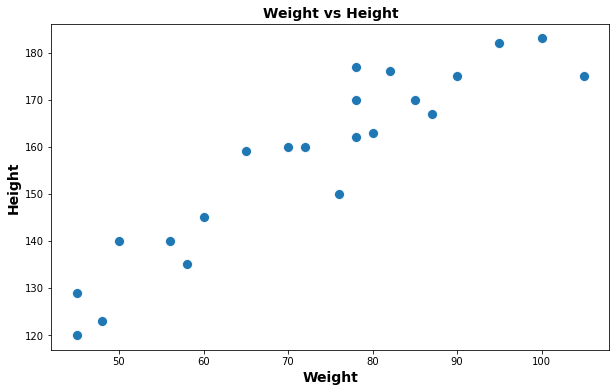

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Weight'],y=df['Height'],palette='black',marker='o',s=100)
plt.xlabel('Weight',fontsize=14,weight='bold')
plt.ylabel('Height',fontsize=14,weight='bold')
plt.title('Weight vs Height',fontsize=14,weight='bold')
plt.show()

Height is dependept and weight is independent.
Simple linear regression because one independent and one dependent feature.

In [35]:
# Divide dataset into dependent and independent feature
X=df[['Weight']] # x is independent feature, it needs to be inside 2D Array while training the model
y=df['Height']

In [36]:
X.shape,y.shape

((23, 1), (23,))

In [56]:
# Train, Test and Split
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# test_size=0.20 means 20% of entire record in x will move to test

In [43]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [44]:
y_train.shape,y_test.shape

((18,), (5,))

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [51]:
X_train=scaler.fit_transform(X_train)
X_train

# fit will calculate mean and standard deviation using z-score formula
# Transform will apply z-score formula on each data point

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [52]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

y variable is output variable. y= height

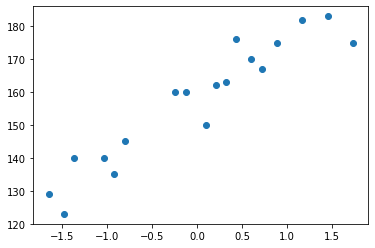

In [55]:
plt.scatter(X_train,y_train)

In [57]:
# Modle Training
from sklearn.linear_model import LinearRegression

In [58]:
regressor=LinearRegression()

In [59]:
# Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

1 input feature Weight is there, so we will get one slope and one intercept

In [61]:
regressor.intercept_ #Theta0

157.5

In [62]:
regressor.coef_   # Theta1

array([17.03440872])

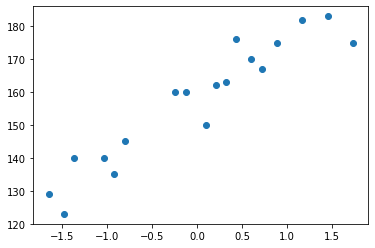

In [63]:
plt.scatter(X_train,y_train)

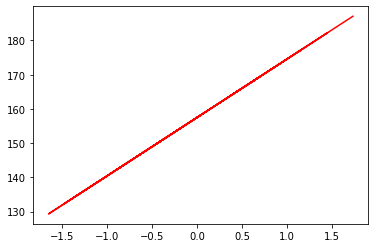

In [64]:
plt.plot(X_train,regressor.predict(X_train),'r')

In [65]:
# Prediction of test data
y_pred=regressor.predict(X_test)

In [66]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [67]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

R square
- Formula

R^2 = 1 - SSR/SST

- R^2 = Accuracy of the model
- SSR = sum of squares of residuals
- SST = total sum of squares

In [72]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [74]:
# Accuracy of model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7769869860423441

Adjusted r square
- Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [75]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254